In [2]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
 

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pandas as pd
import pathlib

2023-11-06 09:35:36.623870: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 09:35:36.656533: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_dir = "archive/data" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

black = list(data_dir.glob('black/*'))
grizzly = list(data_dir.glob('grizzly/*'))
panda = list(data_dir.glob('panda/*'))
polar = list(data_dir.glob('polar/*'))
teddy = list(data_dir.glob('teddy/*'))

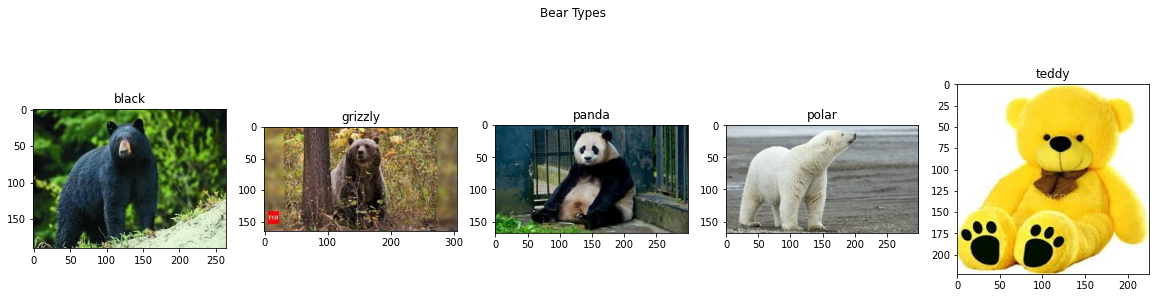

In [4]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Bear Types')
black_image = img.imread(black[0])
grizzly_image = img.imread(grizzly[0])
panda_image = img.imread(panda[0])
polar_image = img.imread(polar[0])
teddy_image = img.imread(teddy[0])

ax[0].set_title('black')
ax[1].set_title('grizzly')
ax[2].set_title('panda')
ax[3].set_title('polar')
ax[4].set_title('teddy')


ax[0].imshow(black_image)
ax[1].imshow(grizzly_image)
ax[2].imshow(panda_image)
ax[3].imshow(polar_image)
ax[4].imshow(teddy_image)

In [5]:
# Contains the images path
df_images = {
    'black' : black,
    'grizzly' : grizzly,
    'panda' : panda,
    'polar' : polar,
    'teddy': teddy
}

# Contains numerical labels for the categories
df_labels = {
    'black' : 0,
    'grizzly' : 1,
    'panda' : 2,
    'polar' : 3,
    'teddy': 4
}

In [6]:
# Data Preprocessing

X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

# Splitting Data and Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train[0].shape

(224, 224, 3)

In [7]:
# The CNN Model
from keras import Sequential

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5))

model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, 
                    validation_data=(X_test, y_test))


2023-11-06 09:35:39.621881: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-11-06 09:35:39.621902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: jrai-TensorBook-late-2021
2023-11-06 09:35:39.621906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: jrai-TensorBook-late-2021
2023-11-06 09:35:39.621984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.113.1
2023-11-06 09:35:39.621996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.113.1
2023-11-06 09:35:39.621999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.113.1


Epoch 1/10
8/8 [==============================] - 2s 204ms/step - loss: 3.2994 - accuracy: 0.2154 - val_loss: 1.4920 - val_accuracy: 0.4355
Epoch 2/10
8/8 [==============================] - 1s 181ms/step - loss: 1.3008 - accuracy: 0.4756 - val_loss: 1.1795 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 1s 186ms/step - loss: 0.9424 - accuracy: 0.6382 - val_loss: 1.4515 - val_accuracy: 0.2903
Epoch 4/10
8/8 [==============================] - 1s 185ms/step - loss: 0.6231 - accuracy: 0.7846 - val_loss: 1.0570 - val_accuracy: 0.6129
Epoch 5/10
8/8 [==============================] - 1s 183ms/step - loss: 0.3064 - accuracy: 0.9146 - val_loss: 0.9311 - val_accuracy: 0.6774
Epoch 6/10
8/8 [==============================] - 1s 181ms/step - loss: 0.1124 - accuracy: 0.9634 - val_loss: 1.0143 - val_accuracy: 0.6935
Epoch 7/10
8/8 [==============================] - 1s 180ms/step - loss: 0.1063 - accuracy: 0.9715 - val_loss: 1.3888 - val_accuracy: 0.6774
Epoch 8/10
8/8 [====

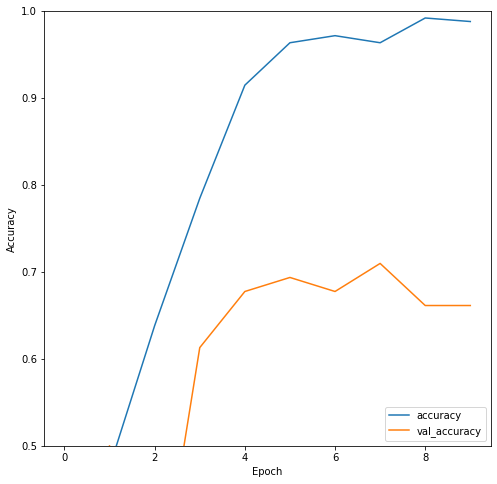

In [8]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
